## Alaska Berry Futures
### Temperature change over time

June 28, 2023   
Using historical temperature data from AK Climate Research Center    


In [1]:
import pandas as pd
import os
import numpy as np

# import matplotlib.pyplot as plt
# import seaborn as sns

In [39]:
#pip install --upgrade pyopenssl


In [2]:
working_directory = os.getcwd()

fairbanks =  pd.read_csv(working_directory + "\\acrc_USW00026411_daily_1687688950564.csv", skiprows=5)

In [9]:
fairbanks.head()

,Date,Maximum Temperature (degF),Mean Temperature (degF),Minimum Temperature (degF)
0,6/1/1900,NaN,NaN,NaN
1,6/2/1900,NaN,NaN,NaN
2,6/3/1900,NaN,NaN,NaN
3,6/4/1900,NaN,NaN,NaN
4,6/5/1900,NaN,NaN,NaN


In [4]:
fairbanks.shape

(44926, 4)

In [8]:
fairbanks.describe()

,Maximum Temperature (degF),Mean Temperature (degF),Minimum Temperature (degF)
count,34150.000000,34149.000000,34150.000000
mean,37.087672,27.004759,16.921406
std,29.511017,28.777970,28.653772
min,-56.000000,-60.500000,-66.000000
25%,15.000000,4.000000,-6.000000
50%,40.000000,31.000000,23.000000
75%,63.000000,53.000000,42.000000
max,96.000000,81.000000,70.000000


In [14]:
fairbanks = fairbanks.dropna(subset=['Maximum Temperature (degF)','Mean Temperature (degF)','Minimum Temperature (degF)'], how='all')

In [16]:
fairbanks.head()

,Date,Maximum Temperature (degF),Mean Temperature (degF),Minimum Temperature (degF)
10775,12/1/1929,37.0,23.0,9.0
10776,12/2/1929,24.0,15.5,7.0
10777,12/3/1929,22.0,17.0,12.0
10778,12/4/1929,12.0,4.5,-3.0
10779,12/5/1929,24.0,14.5,5.0


In [17]:


def temperature_summary(df):
    # Convert date column to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Filter data for the month of June
    df_june = df[df['Date'].dt.month == 6]
    
    # Convert temperature columns from Fahrenheit to Celsius
    df_june['Maximum Temperature (degC)'] = (df_june['Maximum Temperature (degF)'] - 32) * 5/9
    
    # Extract year from date
    df_june['Year'] = df_june['Date'].dt.year
    
    # Calculate number of days in June for each temperature range
    df_summary = df_june.groupby('Year').agg({
        'Maximum Temperature (degC)': [
            lambda x: ((x >= 20) & (x <= 25)).sum(),
            lambda x: (x > 25).sum()
        ]
    })
    
    # Flatten column names
    df_summary.columns = ['Days 20-25 Celsius', 'Days >25 Celsius']
    
    return df_summary




In [18]:
# Example usage:
# Assuming you have a DataFrame called df with the data you provided
june = temperature_summary(fairbanks)
print(june)

      Days 20-25 Celsius  Days >25 Celsius
Year                                      
1930                12.0               3.0
1931                11.0               6.0
1932                14.0               2.0
1933                 3.0               7.0
1934                12.0               7.0
...                  ...               ...
2019                18.0              10.0
2020                17.0               2.0
2021                21.0               6.0
2022                17.0              10.0
2023                 0.0               0.0

[94 rows x 2 columns]


<ipython-input-17-08f801000aef>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_june['Maximum Temperature (degC)'] = (df_june['Maximum Temperature (degF)'] - 32) * 5/9
<ipython-input-17-08f801000aef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_june['Year'] = df_june['Date'].dt.year


In [22]:
june[50:]

,Days 20-25 Celsius,Days >25 Celsius
Year,,
1980,12.0,1.0
1981,15.0,5.0
1982,11.0,5.0
1983,10.0,11.0
1984,15.0,8.0
1985,11.0,2.0
1986,11.0,12.0
1987,16.0,6.0
1988,14.0,9.0


### Mean monthly temp

In [44]:
columns_to_drop = [col for col in AK_temp.columns if 'Min' in col or 'Max' in col]
AK_temp_mean = AK_temp.drop(columns_to_drop, axis=1)

In [45]:
# Convert the relevant columns to numeric data type
numeric_columns = ['janMean', 'febMean', 'marMean', 'aprMean', 'mayMean', 'junMean', 'julMean', 'augMean', 'sepMean', 'octMean', 'novMean', 'decMean']

AK_temp_mean[numeric_columns] = AK_temp_mean[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Group by 'LEVEL_2' and 'daterange' - find mean of regional means
regional_temp_mean = AK_temp_mean.groupby(['LEVEL_2', 'daterange'])[numeric_columns].mean()


In [49]:
#VACVIT flowers in June
regional_temp_mean['junMean'].to_list()

[14.025000000000015,
 15.52115384615385,
 17.284615384615396,
 11.27884615384614,
 10.278378378378378,
 11.718918918918915,
 13.03513513513515,
 8.243243243243224,
 7.6333333333333355,
 9.133333333333333,
 10.806666666666668,
 5.42,
 12.17790697674416,
 13.763953488372099,
 15.09302325581394,
 9.84651162790698,
 9.520689655172408,
 11.313793103448278,
 12.489655172413798,
 6.989655172413799,
 13.699999999999998,
 15.199999999999996,
 17.166666666666664,
 11.166666666666666,
 13.275324675324674,
 14.615584415584394,
 16.096103896103898,
 10.979220779220778,
 16.195744680851064,
 17.67659574468084,
 19.12021276595746,
 13.731914893617018,
 15.01538461538462,
 16.661538461538473,
 18.43846153846154,
 11.838461538461532]

## Max monthly temp

In [47]:
columns_to_drop = [col for col in AK_temp.columns if 'Min' in col or 'Mean' in col]
AK_temp_max = AK_temp.drop(columns_to_drop, axis=1)

# Convert the relevant columns to numeric data type
numeric_columns = ['janMax', 'febMax', 'marMax', 'aprMax', 'mayMax', 'junMax', 'julMax', 'augMax', 'sepMax', 'octMax', 'novMax', 'decMax']

AK_temp_max[numeric_columns] = AK_temp_max[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Group by 'LEVEL_2' and 'daterange' - find mean of regional max temps
regional_temp_max = AK_temp_max.groupby(['LEVEL_2', 'daterange'])[numeric_columns].mean()


In [48]:
#VACVIT flowers in June
regional_temp_max['junMax'].to_list()

[20.180769230769215,
 22.25961538461542,
 22.64615384615384,
 nan,
 12.862162162162162,
 14.821621621621615,
 15.932432432432435,
 nan,
 12.993333333333327,
 15.82666666666666,
 16.879999999999992,
 nan,
 17.43837209302324,
 19.852325581395345,
 20.074418604651147,
 nan,
 14.203448275862065,
 17.13103448275863,
 17.268965517241377,
 nan,
 19.133333333333336,
 22.63333333333333,
 23.166666666666668,
 nan,
 17.820779220779237,
 20.4792207792208,
 20.987012987012985,
 nan,
 23.080851063829744,
 25.340425531914885,
 25.50531914893617,
 nan,
 21.500000000000004,
 24.25384615384617,
 24.307692307692317,
 nan]

## Melt and visualize

In [12]:
# reshape the data using melt
df = pd.melt(regional_temp_mean.reset_index(), id_vars=['LEVEL_2', 'daterange'], var_name='month', value_name='temperature')

# rename the columns
df = df.rename(columns={'month': 'month_name'})

# remove the 'Mean' part from the month names
df['month_name'] = df['month_name'].str.replace('Mean', '')

In [13]:
#df.to_excel("alaska_regional_precipitation_predictions_melt.xlsx", index=False)

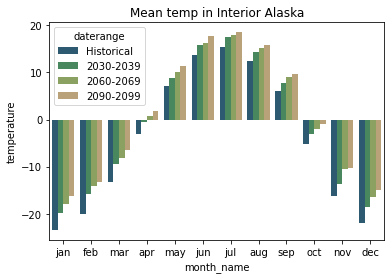

In [23]:
Interior = df[df['LEVEL_2']=='Intermontane Boreal'].copy()

# specify the order of daterange levels
daterange_order = ['Historical', '2030-2039', '2060-2069', '2090-2099']

# create the bar plot with the specified order of daterange levels
sns.barplot(data=Interior, x="month_name", y="temperature", hue="daterange", palette="gist_earth", hue_order=daterange_order)
plt.title("Mean temp in Interior Alaska")
plt.savefig("interior_precipitation.png")

# Historical Data

In [52]:
historical_temp =  pd.read_csv(working_directory + "\\Historic Climate Data for AK Communities and Regions_Predicting Percent Days Above 18, 20, 25C - AK communities climate data.csv")


In [55]:
historical_temp_june = historical_temp[historical_temp['Month']==6].copy()

In [64]:
historical_temp_june.groupby(['NAME','Year'])['TMAX>=20'].sum()#.to_csv('AK_historical_temp_june_max20.csv')

In [65]:
historical_temp_june.groupby(['NAME','Year'])['TMAX>=25'].sum()#.to_csv('AK_historical_temp_june_max25.csv')